# OMDENA LOCAL CHAPTER CHALLENGE

### Autism Spectrum Disorder (ASD) prediction in toddlers and kids in Sri Lanka
### by: Ibrahim Ahmad Ismail

In [715]:
# Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting an initial style
plt.style.use('ggplot')

# Loading the dataset
asd = pd.read_csv("C:/Users/Ahmad/Desktop/Python/MLPractice/omdena-sl-autism/asd_omdena_data_csv.csv")
asd.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


### Data Cleaning and Validation

In [716]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [717]:
asd.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [718]:
asd.describe().T

,count,mean,std,min,25%,50%,75%,max
CASE_NO_PATIENT'S,1985.0,993.000000,573.164462,1.0,497.0,993.0,1489.0,1985.0
A1,1985.0,0.299244,0.458042,0.0,0.0,0.0,1.0,1.0
A2,1985.0,0.238287,0.426143,0.0,0.0,0.0,0.0,1.0
A3,1985.0,0.213098,0.409600,0.0,0.0,0.0,0.0,1.0
A4,1985.0,0.272040,0.445123,0.0,0.0,0.0,1.0,1.0
A5,1985.0,0.278589,0.448418,0.0,0.0,0.0,1.0,1.0
A6,1985.0,0.306297,0.461071,0.0,0.0,0.0,1.0,1.0
A7,1985.0,0.345088,0.475517,0.0,0.0,0.0,1.0,1.0
A8,1985.0,0.243829,0.429499,0.0,0.0,0.0,0.0,1.0
A9,1985.0,0.259950,0.438717,0.0,0.0,0.0,1.0,1.0


In [719]:
# Checking for duplication
asd.duplicated().value_counts()

# Checking for missing values
asd.isna().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [720]:
# Understanding the missing values in the column
asd[asd.Qchat_10_Score.isna()].head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
1055,1056,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Health Care Professional,Yes
1065,1066,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Family Member,Yes
1075,1076,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Family Member,Yes
1085,1086,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Family Member,Yes
1095,1096,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Health Care Professional,Yes


We can see that the 10-Item Autism Spectrum QChat was not filled for rows where the Qchat_10_Score contained missing item, so I can drop the columns. Also, for other missing columns the no of rows seems inconsequential, and given the nature of the dataset, I will be dropping them.

In [721]:
# What percentage of the data is missing
asd.isna().sum()/len(asd) * 100

CASE_NO_PATIENT'S                                     0.000000
A1                                                    0.000000
A2                                                    0.000000
A3                                                    0.000000
A4                                                    0.000000
A5                                                    0.000000
A6                                                    0.000000
A7                                                    0.000000
A8                                                    0.000000
A9                                                    0.000000
A10_Autism_Spectrum_Quotient                          0.000000
Social_Responsiveness_Scale                           0.453401
Age_Years                                             0.000000
Qchat_10_Score                                        1.964736
Speech Delay/Language Disorder                        0.000000
Learning disorder                                     0

In [722]:
# Dropping the missng values
asd = asd.dropna(subset=['Social_Responsiveness_Scale', 'Depression', 'Qchat_10_Score', 'Social/Behavioural Issues'])
asd.shape

(1923, 28)

In [723]:
# Who completed the test?
asd.Who_completed_the_test.value_counts()

Health Care Professional    1197
Family Member                643
Family member                 58
School and NGO                18
Self                           4
Others                         3
Name: Who_completed_the_test, dtype: int64

In [724]:
# Remapping the variables to clean the column
asd["Who_completed_the_test"] = asd["Who_completed_the_test"].map({'Family member': 'Family Member',
                                                                 'Family Member': 'Family Member',
                                                                 'Health Care Professional': 'Health Care Professional',
                                                                 'Health care professional': 'Health Care Professional',
                                                                 'Self': 'Others',
                                                                 'Others': 'Others'})
asd.Who_completed_the_test.value_counts()                                                                 


Health Care Professional    1197
Family Member                701
Others                         7
Name: Who_completed_the_test, dtype: int64

In [725]:
# Cleaning the Ethnicity column
asd['Ethnicity'] = asd['Ethnicity'].map({
    'White European':'White European', 'Middle Eastern':'Middle Eastern', 'asian':'Asian', 'Asian':'Asian',
    'south asian':'South Asian', 'South Asian':'South Asian', 'middle eastern':'Middle Eastern',
    'Hispanic':'Hispanic', 'Black':'Black', 'black':'Black', 'mixed':'Mixed', 'Mixed':'Mixed', 'Latino':'Latino',
    'Native Indian':'Native Indian', 'PaciFica':'PaciFica', 'Others':'Others', 'others':'Others',
})
asd.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,Middle Eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


### Exploratory Data Analysis

#### Univariate Analysis

QChat_10_Score column seems to be cummulative score of the A1 to A10, let's see it's distribution.

[Text(0.5, 1.0, 'Plot 1: Distribution of QChat-10 Score')]

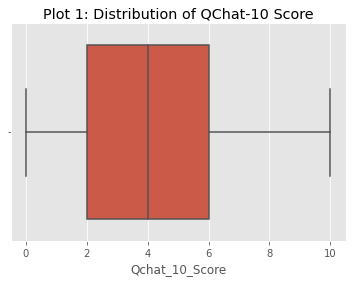

In [726]:
#boxplot to show spread of QChat score
sns.boxplot(data=asd, x='Qchat_10_Score').set(title = 'Plot 1: Distribution of QChat-10 Score')

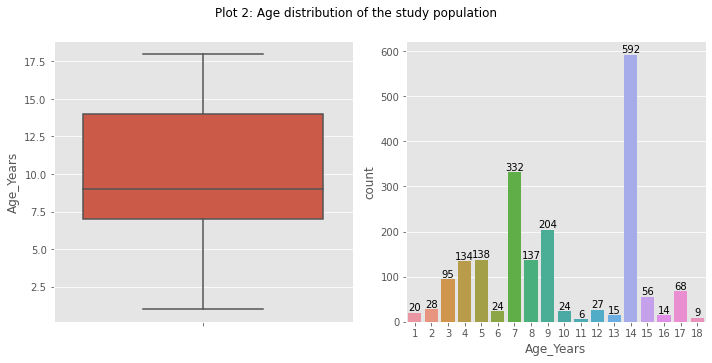

In [727]:
#preparing the grid
fig, axes = plt.subplots(1,2, figsize=(10,5))

# checking the spread of the age
sns.boxplot(data=asd, y='Age_Years', ax=axes[0])

# Check the age distribution since we are interested in toddlers
ax = sns.countplot(data=asd, x='Age_Years', ax=axes[1])

# to display the count of each bar
for i in ax.containers:
    ax.bar_label(i, labels = [str(i.get_height()) for i in i.get_children()])

plt.suptitle("Plot 2: Age distribution of the study population", y=1.0)
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Plot 3: Ethnicity distribution')]

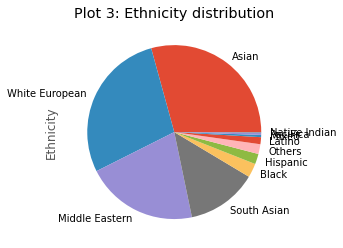

In [728]:
# Ethnicity in the data
asd.Ethnicity.value_counts().plot(kind='pie').set(title= 'Plot 3: Ethnicity distribution')

Text(0.5, 1.0, 'Plot 4: Who completed the QChat tests?')

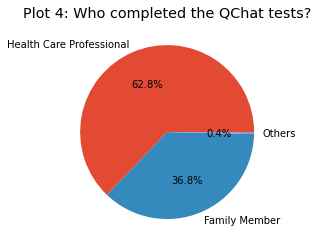

In [729]:
# We may also be interested in who completed the chat/test
data = asd.Who_completed_the_test.value_counts()
explode = (0.1, 0.0)
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Plot 4: Who completed the QChat tests?")

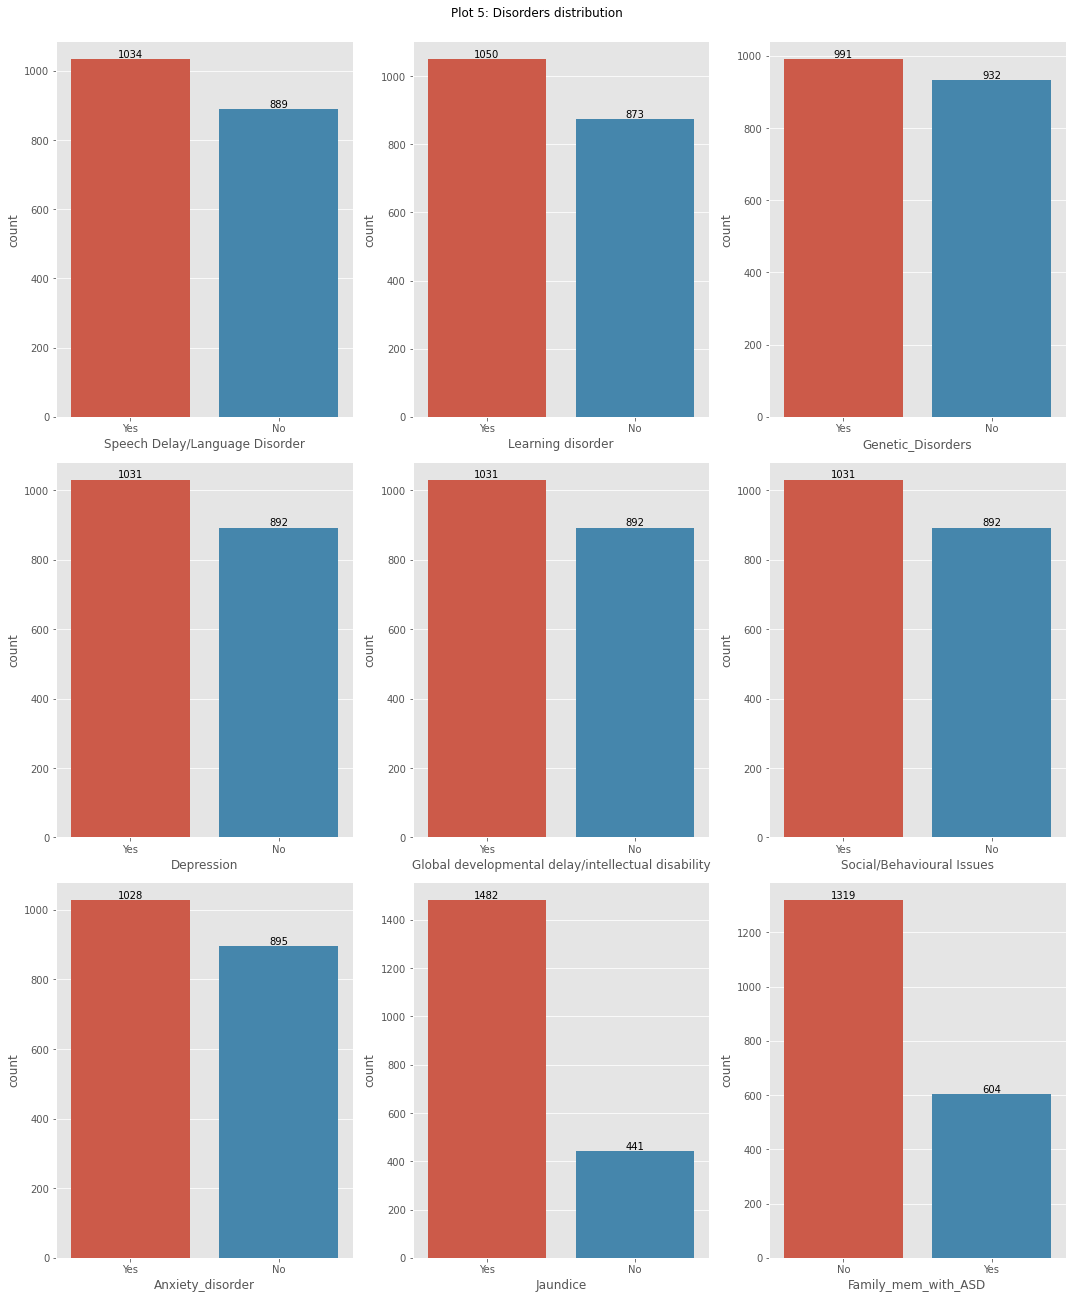

In [730]:
# There are a number of disorders/unique features highlighted in, lets check their distribution
disorders_col = ['Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Anxiety_disorder', 'Jaundice',
       'Family_mem_with_ASD']

# prepare our grid       
plt.subplots(3,3, figsize=(15,18))

disorders = asd.loc[:, disorders_col]
col_num = 1

# Looping through the columns
for col in disorders_col:
    plt.subplot(3,3, col_num)
    ax = sns.countplot(data=disorders, x=col)
    col_num += 1
    # to display the count of each bar
    for i in ax.containers:
        ax.bar_label(i, labels = [str(i.get_height()) for i in i.get_children()])

plt.suptitle("Plot 5: Disorders distribution", y=1.0)
plt.tight_layout()

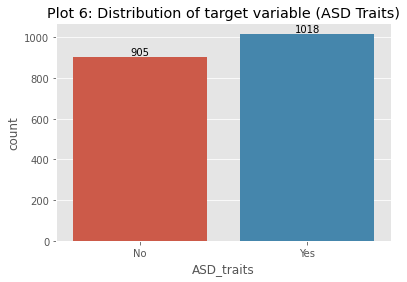

In [731]:
# Checking the distribution of the target variable "ASD Traits"
ax = sns.countplot(data=asd, x='ASD_traits')
ax.set(title="Plot 6: Distribution of target variable (ASD Traits)")

# to display the count of each bar
for i in ax.containers:
    ax.bar_label(i, labels = [str(i.get_height()) for i in i.get_children()])

#### Bivariate Analysis
Exploring the relationships between variables and the target feature (ASD Traits)

How are the social demographics distributed in the target variable?

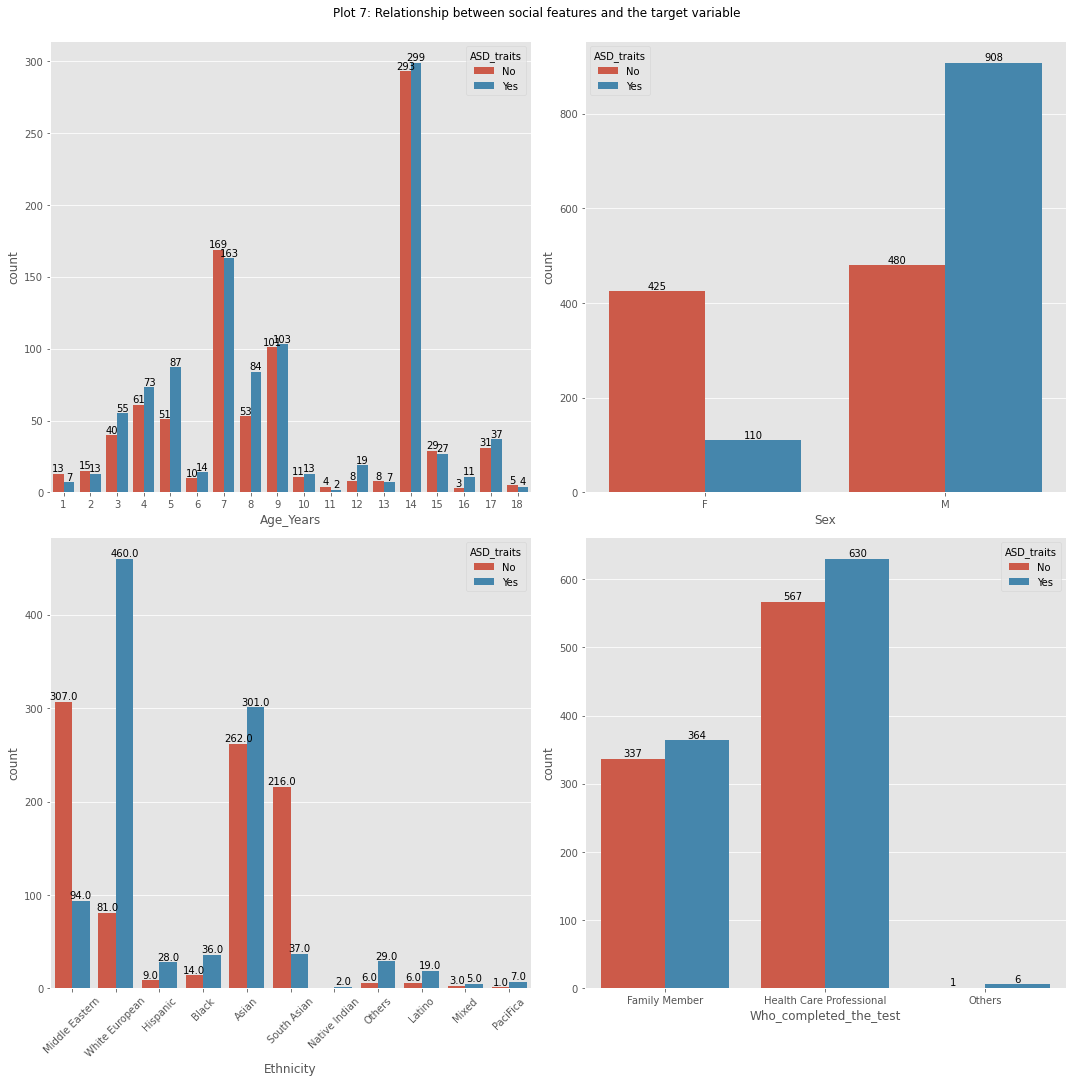

In [732]:
# Highlight the social features
social_col = ['Age_Years', 'Sex', 'Ethnicity', 'Who_completed_the_test']
social_df = asd.loc[:, social_col]

# create a fig layout
plt.subplots(2, 2, figsize=(15, 15))

# loop through the grid
fig_num = 1
for col in social_col:
    plt.subplot(2,2, fig_num)
    ax = sns.countplot(data=asd, x=col, hue=asd.ASD_traits)
    fig_num += 1

    # to display the count of each bar
    for i in ax.containers:
        ax.bar_label(i, labels = [str(i.get_height()) for i in i.get_children()])
    
    # rotate the ethnicity label
    if col == 'Ethnicity':
        plt.xticks(rotation=45)


plt.suptitle("Plot 7: Relationship between social features and the target variable", y=1.0)
plt.tight_layout()


How do the disorders we highlighted earlier translate into ASD traits in the sample population?

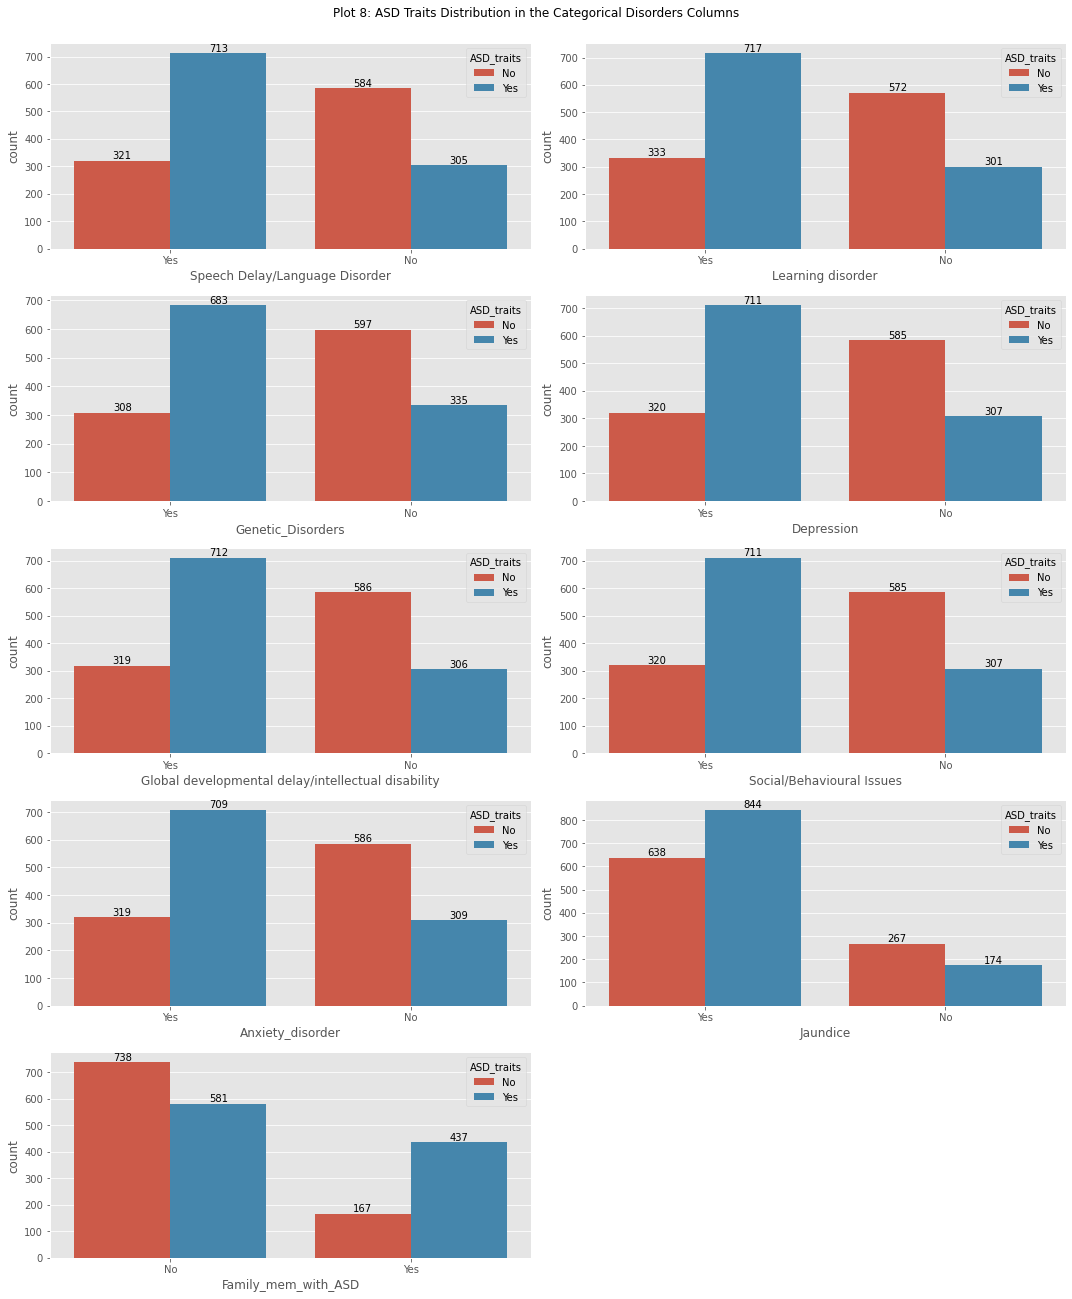

In [733]:
## Visualize the relationship between the categorical features and the target
# Set up grid of subplots
fig, axs = plt.subplots(5, 2, figsize = (15, 18))

# Initialize counter
plot_num = 1

disorders_df = asd.loc[:, disorders_col]

# Loop through column names in list
for col in disorders_col:
    plt.subplot(5, 2, plot_num)
    ax = sns.countplot(data=disorders_df, x=col, hue=asd.ASD_traits)
    plot_num +=1

    # to display the count of each bar
    for i in ax.containers:
        ax.bar_label(i, labels = [str(i.get_height()) for i in i.get_children()])
    
fig.delaxes(axs[4, 1])
plt.suptitle("Plot 8: ASD Traits Distribution in the Categorical Disorders Columns", y=1.0)
plt.tight_layout()
plt.show()

To assess the Childhood Autism Rating Scale which is a 15-Item behavioural rating scale that identifies children with autism, and distinguish them from developmentally handicapped children without Autism.

In [734]:
asd['Childhood Autism Rating Scale'].describe().T

count    1923.000000
mean        1.712949
std         1.022013
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Childhood Autism Rating Scale, dtype: float64

How does this scale relate to the presence of ASD traits in our data?

Text(0.5, 1.0, 'Relationship between Childhood Austism rating Scale and ASD Traits')

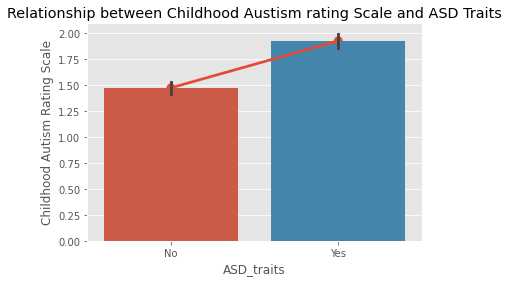

In [751]:
sns.pointplot(x='ASD_traits', y='Childhood Autism Rating Scale', data=asd)
sns.barplot(x='ASD_traits', y='Childhood Autism Rating Scale', data=asd)

plt.title("Plot 9: Relationship between Childhood Austism rating Scale and ASD Traits")

We can see there's a relationship between the Childhood Austism rating Scale and The ASD Traits occurence.

The columns A1 through A10 denotes the questions of the QChat-10 ASD assessment tool. They're a set of Yes and No questions that have been converted to 0s and 1s. What is their relationship/distribution with the target variable>

In [736]:
# Renaming the 10th column to follow others
asd = asd.rename(columns={'A10_Autism_Spectrum_Quotient':'A10'})
#creating the qchat df
qchat = asd.iloc[:, 1:11]
qchat.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,0,1,1,0,1
1,1,1,0,0,0,1,1,0,0,0
2,1,0,0,0,0,0,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1


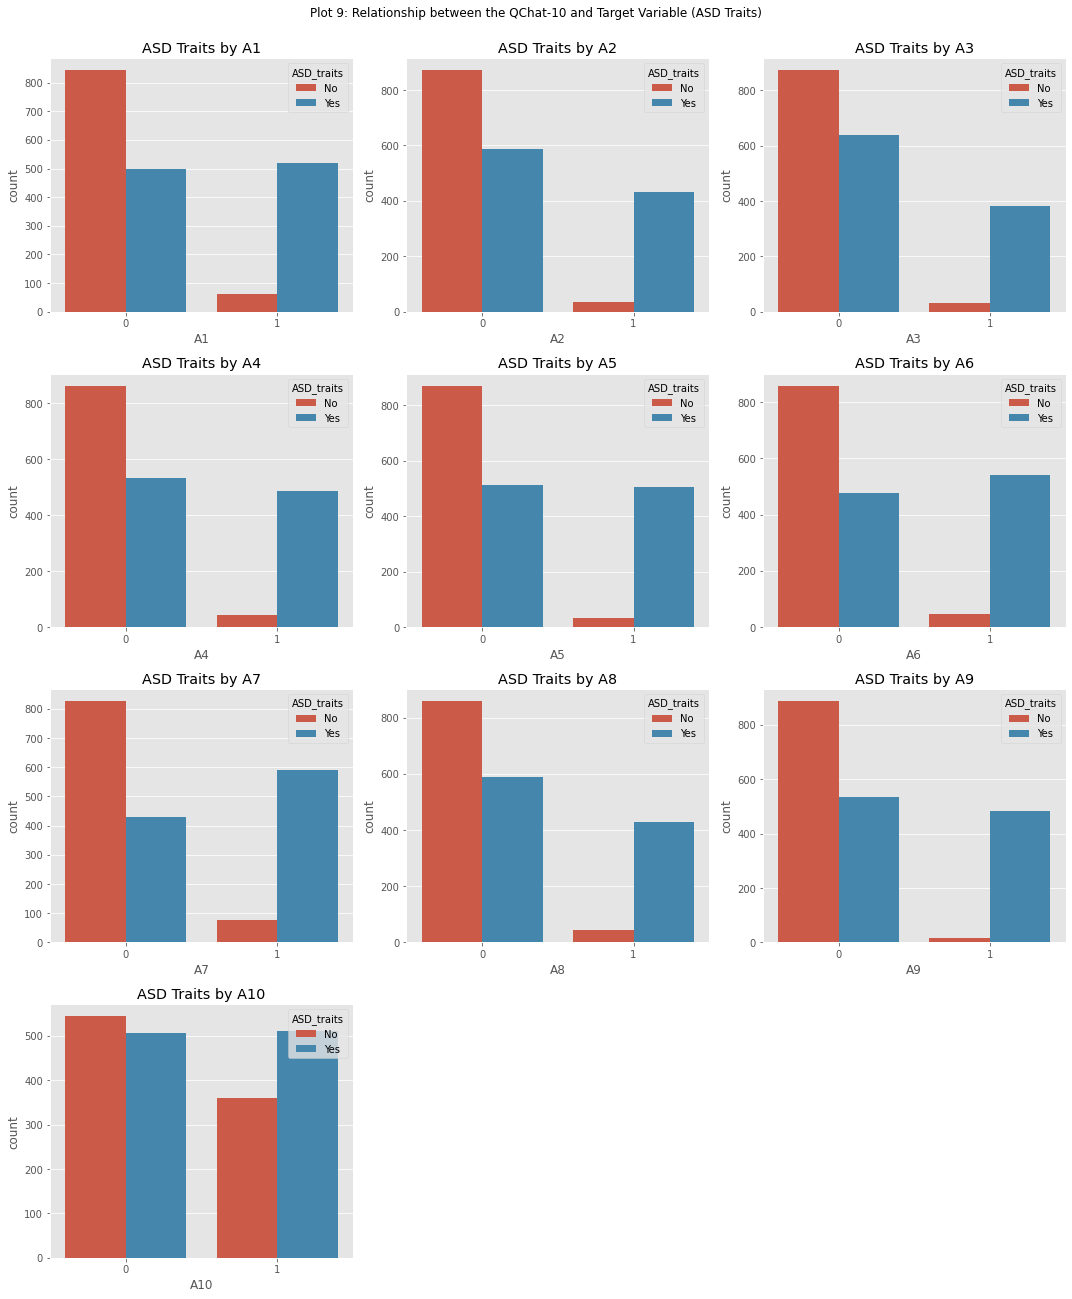

In [737]:
fig, axes = plt.subplots(4,3, figsize=(15,18))

col_num = 1

# Looping through the columns
for col in qchat:
    plt.subplot(4,3, col_num)
    ax = sns.countplot(data=qchat, x=col, hue=asd.ASD_traits).set(title=f"ASD Traits by {col}")
    col_num += 1
    # to display the count of each bar

fig.delaxes(axes[3, 1])
fig.delaxes(axes[3, 2])
plt.suptitle("Plot 10: Relationship between the QChat-10 and Target Variable (ASD Traits)", y=1.0)
plt.tight_layout()

### What is the relationship between all our variables?

Columns like CASE_NO_PATIENT'S and Who_completed_the_test will be dropped as they don't seem useful in the work. The Qchat_10_Score will be also dropped as it is the sum of the A1 to A10.

In [738]:
clean_asd = asd.drop(columns=['Qchat_10_Score', 'Who_completed_the_test', "CASE_NO_PATIENT'S"])

clean_asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Social_Responsiveness_Scale', 'Age_Years',
       'Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'ASD_traits'],
      dtype='object')

In [739]:
colo = ['Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Anxiety_disorder', 'Jaundice',
       'Family_mem_with_ASD', 'ASD_traits']

for col in colo:
    clean_asd[col] = np.where(clean_asd[col] == 'Yes', 1, 0)
    print(clean_asd[col].value_counts())

1    1034
0     889
Name: Speech Delay/Language Disorder, dtype: int64
1    1050
0     873
Name: Learning disorder, dtype: int64
1    991
0    932
Name: Genetic_Disorders, dtype: int64
1    1031
0     892
Name: Depression, dtype: int64
1    1031
0     892
Name: Global developmental delay/intellectual disability, dtype: int64
1    1031
0     892
Name: Social/Behavioural Issues, dtype: int64
1    1028
0     895
Name: Anxiety_disorder, dtype: int64
1    1482
0     441
Name: Jaundice, dtype: int64
0    1319
1     604
Name: Family_mem_with_ASD, dtype: int64
1    1018
0     905
Name: ASD_traits, dtype: int64


In [740]:
clean_asd.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,...,1,1,1,1,1,F,Middle Eastern,1,0,0
1,1,1,0,0,0,1,1,0,0,0,...,1,1,1,2,1,M,White European,1,0,1
2,1,0,0,0,0,0,1,1,0,1,...,1,1,1,4,1,M,Middle Eastern,1,0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,M,Hispanic,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,F,White European,0,0,1


In [741]:
clean_asd = pd.get_dummies(clean_asd, columns=['Ethnicity'])
clean_asd.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Mixed,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_PaciFica,Ethnicity_South Asian,Ethnicity_White European
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [742]:
# Dropping the "Ethnicity_Other" column
clean_asd = clean_asd.drop(columns=['Ethnicity_Others'])

clean_asd.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Mixed,Ethnicity_Native Indian,Ethnicity_PaciFica,Ethnicity_South Asian,Ethnicity_White European
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [743]:
col_at_end = ['ASD_traits']
clean_asd = clean_asd[[col for col in clean_asd if col not in col_at_end] 
        + [col for col in col_at_end if col in clean_asd]]
clean_asd.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Mixed,Ethnicity_Native Indian,Ethnicity_PaciFica,Ethnicity_South Asian,Ethnicity_White European,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1


In [744]:
asd_corr = clean_asd.corr()
asd_corr

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Mixed,Ethnicity_Native Indian,Ethnicity_PaciFica,Ethnicity_South Asian,Ethnicity_White European,ASD_traits
A1,1.000000,0.636122,0.465419,0.508709,0.533473,0.614322,0.606938,0.464566,0.552648,0.251465,...,0.077522,0.122187,0.054454,-0.103574,0.010257,0.013904,0.063041,-0.138839,0.117233,0.479714
A2,0.636122,1.000000,0.401531,0.479825,0.481337,0.536366,0.544507,0.454785,0.477304,0.249183,...,0.151943,0.106561,0.053122,-0.071645,0.057843,-0.018222,0.095580,-0.119208,0.108528,0.449745
A3,0.465419,0.401531,1.000000,0.669954,0.530371,0.508309,0.465508,0.434346,0.544221,0.143001,...,0.129077,0.073997,0.096253,-0.088229,0.025115,0.022351,0.084084,-0.121527,0.071831,0.410215
A4,0.508709,0.479825,0.669954,1.000000,0.561406,0.582092,0.583863,0.478151,0.610613,0.174543,...,0.097172,0.091953,0.093972,-0.077734,0.032647,0.016298,0.068853,-0.139493,0.094472,0.479690
A5,0.533473,0.481337,0.530371,0.561406,1.000000,0.626327,0.603674,0.525217,0.618670,0.195563,...,0.109278,0.064501,0.061420,-0.128857,-0.004287,0.015830,0.049709,-0.122634,0.086679,0.508735
A6,0.614322,0.536366,0.508309,0.582092,0.626327,1.000000,0.631194,0.517827,0.619650,0.217351,...,0.054482,0.079391,0.103005,-0.121694,0.027161,0.048559,0.079743,-0.181869,0.116154,0.520284
A7,0.606938,0.544507,0.465508,0.583863,0.603674,0.631194,1.000000,0.522925,0.598341,0.291981,...,0.100415,0.104527,0.118743,-0.121775,0.037687,-0.023541,0.037687,-0.164417,0.099758,0.517213
A8,0.464566,0.454785,0.434346,0.478151,0.525217,0.517827,0.522925,1.000000,0.495235,0.203746,...,0.141604,0.077999,0.104793,-0.091606,0.019273,0.018980,0.019273,-0.129803,0.058095,0.428066
A9,0.552648,0.477304,0.544221,0.610613,0.618670,0.619650,0.598341,0.495235,1.000000,0.176862,...,0.059130,0.071893,0.067666,-0.098161,0.016769,0.054287,0.035164,-0.126260,0.091560,0.517711
A10,0.251465,0.249183,0.143001,0.174543,0.195563,0.217351,0.291981,0.203746,0.176862,1.000000,...,0.028403,0.062521,0.033783,-0.084431,0.022272,0.035424,0.054729,0.248074,-0.014684,0.103340


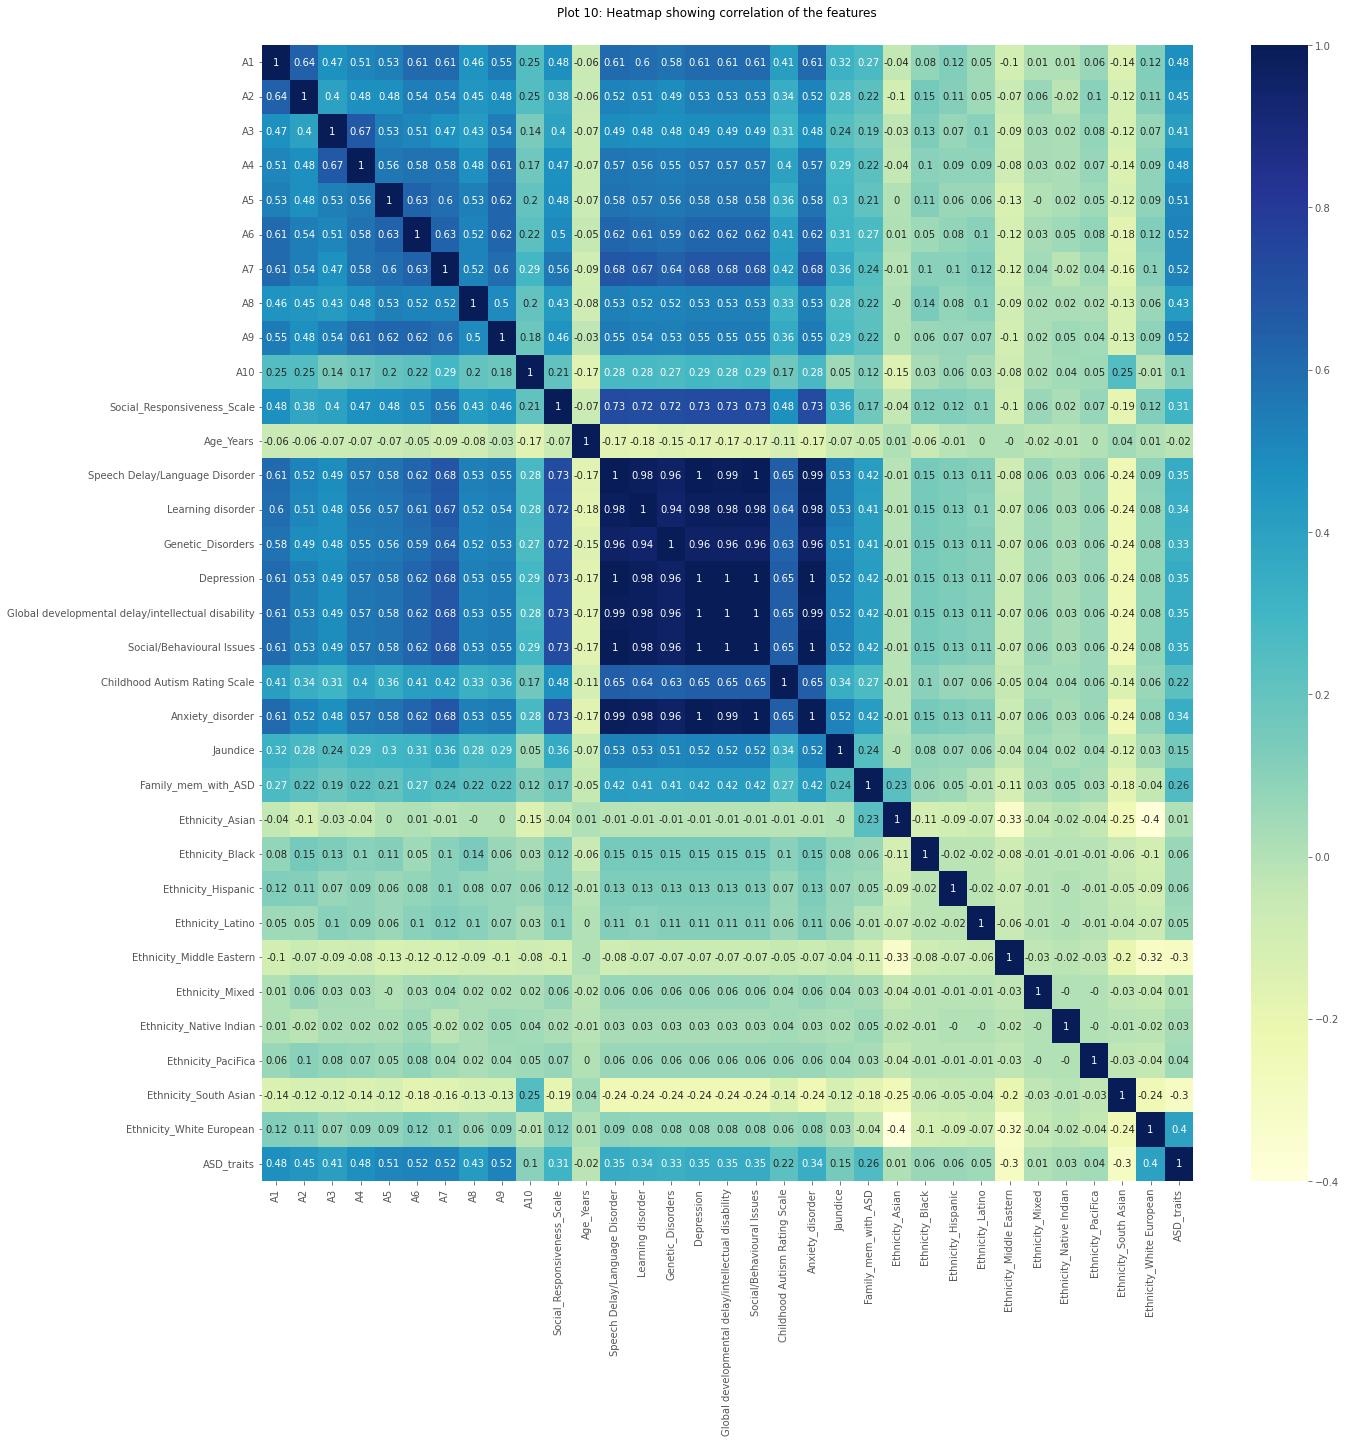

In [754]:
# heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(asd_corr.round(2), annot=True, cmap='YlGnBu')
plt.suptitle("Plot 11: Heatmap showing correlation of the features", y=1.0)
plt.tight_layout()

In [746]:
clean_asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Social_Responsiveness_Scale', 'Age_Years',
       'Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Jaundice', 'Family_mem_with_ASD',
       'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Hispanic',
       'Ethnicity_Latino', 'Ethnicity_Middle Eastern', 'Ethnicity_Mixed',
       'Ethnicity_Native Indian', 'Ethnicity_PaciFica',
       'Ethnicity_South Asian', 'Ethnicity_White European', 'ASD_traits'],
      dtype='object')

In [747]:
dcol = clean_asd[['Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Anxiety_disorder', 'Jaundice', 'Family_mem_with_ASD']]
disorder_score = dcol.mean(axis=1)
clean_asd['disorder_score'] = disorder_score
clean_asd.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Mixed,Ethnicity_Native Indian,Ethnicity_PaciFica,Ethnicity_South Asian,Ethnicity_White European,ASD_traits,disorder_score
0,0,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0.888889
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0.888889
2,1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0.888889
3,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0.666667
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0.666667


In [748]:
disorder_score.describe().T

count    1923.000000
mean        0.536315
std         0.435667
min         0.000000
25%         0.111111
50%         0.888889
75%         1.000000
max         1.000000
dtype: float64

Text(0.5, 0.98, 'Plot 12: KDE plot of ASD Traits and sum of disorders')

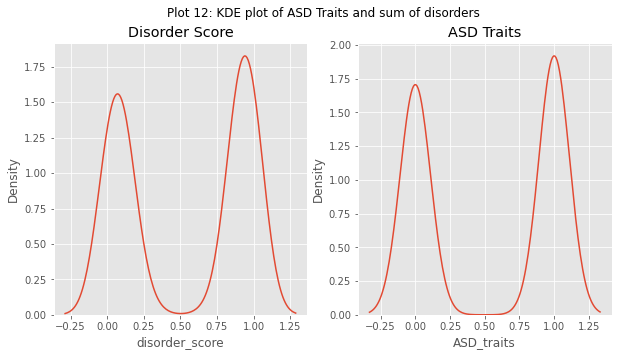

In [755]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.kdeplot(data=clean_asd, x='disorder_score', ax=axes[0]).set_title("Disorder Score")
sns.kdeplot(data=clean_asd, x='ASD_traits',ax=axes[1]).set_title("ASD Traits")

plt.suptitle("Plot 12: KDE plot of ASD Traits and sum of disorders")

# Exploratory DA Insights



The first plot shows spread of QChat 10 score, which is the total score of the A1 to A10. We can see that the median score is 4, with majority of the participants scoring between 2 and 6 point.

Plot 2 shows the distribution of age in the data, with a mean age of 9.6 and median of 9 years. Perhaps this dataset may not be very suitable for the project's goal of toddlers and child age ranges.

Pot 3 shows the ethnicity distribution in the data, with Asian, White European, Middle eastern and South Asian nationalitites being the most occurent. Plot 4 shows that majority of the tests were filled by Healthcare professionals ands family members.

Plot 5 displays the distribution of some major disorders. Majority of the participants had Jaundice (77%), and 69% has a family member with ASD. Others like Depression, Learning disoder and genetic disorder seem evenly distributed in the data. This is similarly observed in the distribution of the target variable, wih approximately 53% having ASD traits.

Comparing differences in age and occurence of ASD traits, ages **3, 4, 5, 8, 12 and 16**  seem to be the age at which ASD traits are most prevalent. **Males predominantly have ASD traits than females**, and in regionality, the most traits are notable in **white europeans.** as seen in Plot 7.


Plot 11 shows the correlation between the features. We can see that disorders like Depression, learing disorders , social and behavioral are deeply correlated with each other. Plot 12 relates the  KDE plot of the Sum of disorders to that of the target variable, ASD traits. **Perhaps it shows a direct correlation?.**